In [61]:
# with pip
%pip install pandas
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [97]:
# with import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = pd.read_csv('./statsfinal.csv')

In [102]:
data.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


In [65]:
print(set(len(date) for date in data['Date']))

{9, 10}


Question (1) Is there any trend in the sales of all four products during certain months?

In [66]:
data_month = data
months = [date[3:] for date in data_month['Date']]
data_month['Month'] = months
data_month.head(5)


,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,06-2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,06-2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,06-2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,06-2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,06-2010


In [130]:
data1 = pd.DataFrame(columns=data_month.columns[2:])
for month in data_month['Month'].unique():
    newRow = {'Month': month}
    for col in data_month.columns[2:-1]:
        if col[0] == 'Q':
           newRow[col] = np.median(data_month[data_month['Month'] == month][col]) 
        else:
            newRow[col] = np.mean(data_month[data_month['Month'] == month][col])
        # newRow[col] = np.sum(data_month[data_month['Month'] == month][col])
    data1.loc[len(data1)] = newRow

data1.head(10)



,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month
0,86203,37461,49110,20134,273263.51,237502.74,266176.20,143555.42,06-2010
1,142711,59313,88764,33606,452393.87,376044.42,481100.88,239610.78,07-2010
2,98246,62008,100923,34600,311439.82,393130.72,547002.66,246698.00,08-2010
3,114996,66165,91704,35554,364537.32,419486.10,497035.68,253500.02,09-2010
4,130310,66011,90204,32434,413082.70,418509.74,488905.68,231254.42,10-2010
5,110061,76617,103694,32705,348893.37,485751.78,562021.48,233186.65,11-2010
6,129444,65735,105726,32955,410337.48,416759.90,573034.92,234969.15,12-2010
7,89238,64792,99424,34343,282884.46,410781.28,538878.08,244865.59,01-2011
8,95308,68078,91416,34992,302126.36,431614.52,495474.72,249492.96,02-2011
9,130760,62332,90003,33229,414509.20,395184.88,487816.26,236922.77,03-2011


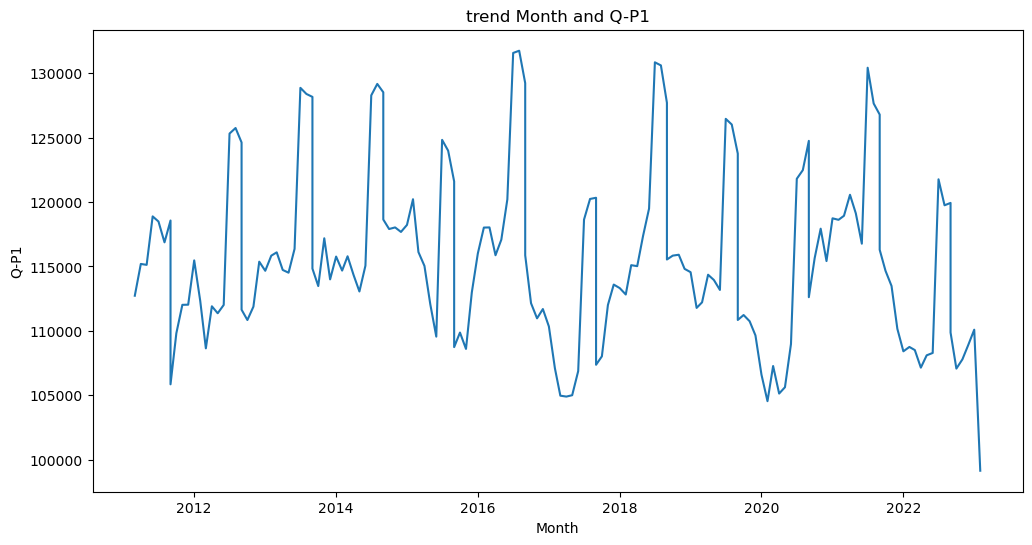

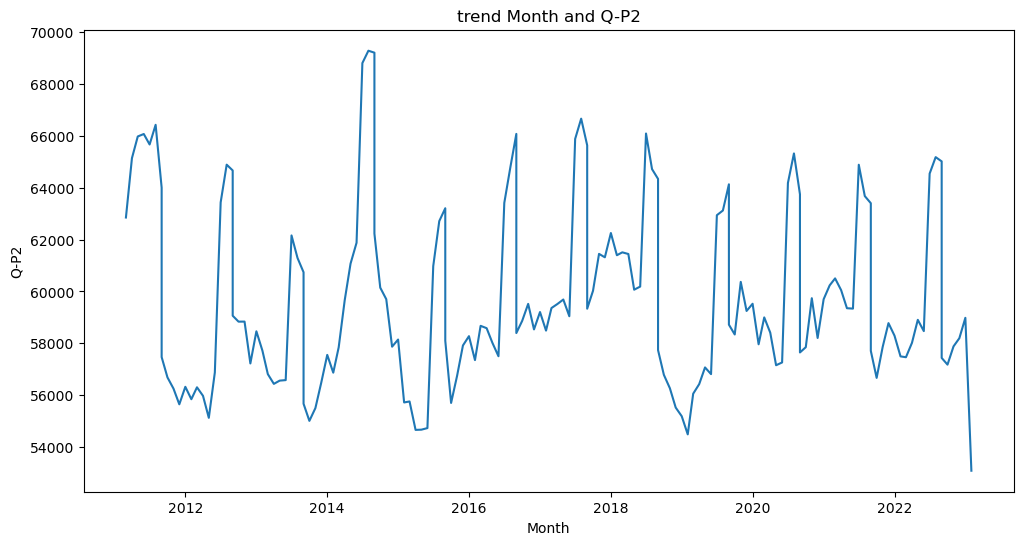

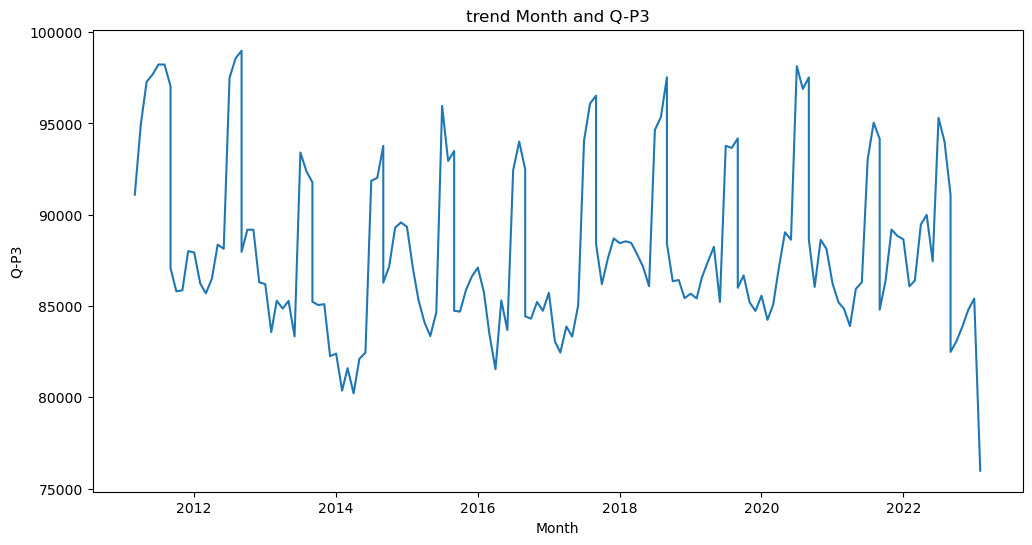

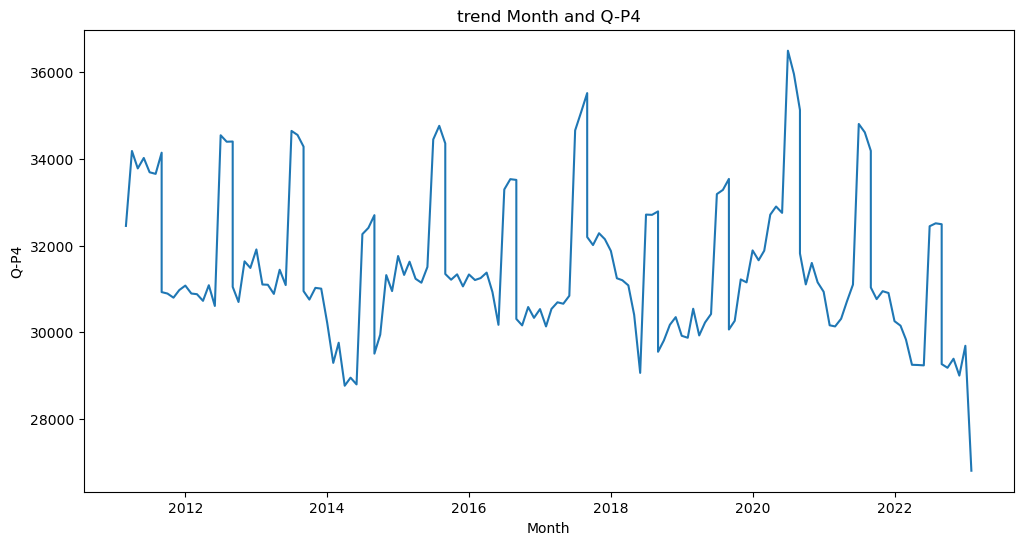

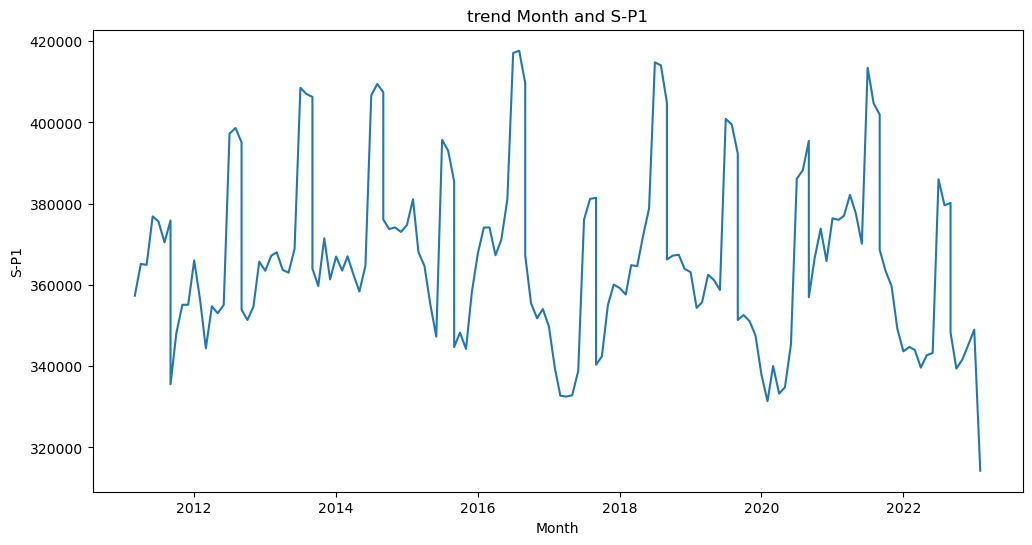

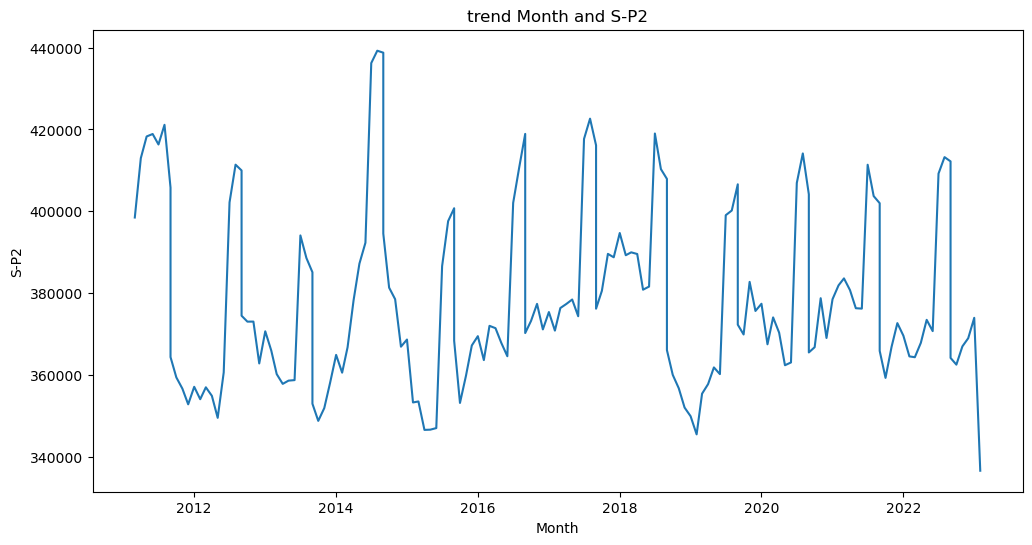

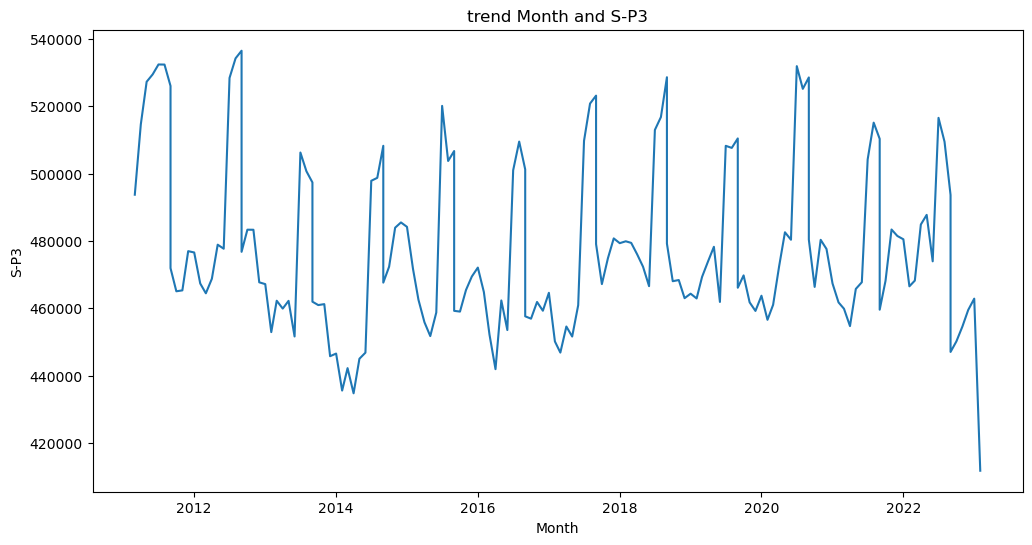

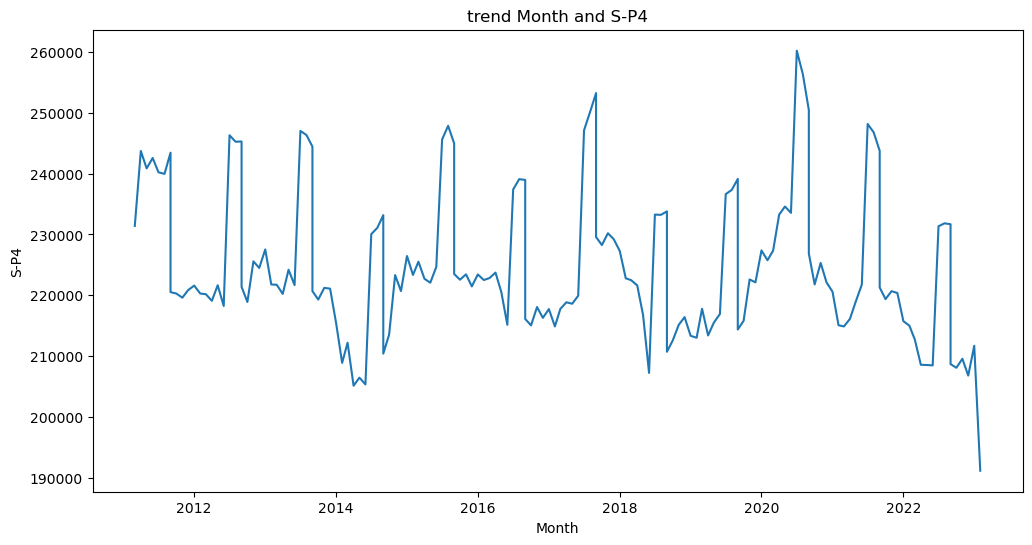

In [131]:
sample = data1
for col in data1.columns[:-1]:
    plt.figure(figsize=(12, 6))

    moving_average = sample[col].rolling(window=10).mean()
    plt.plot(pd.to_datetime(sample['Month'], format='%m-%Y', errors='coerce'), moving_average)
    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.title('trend Month and ' + col)

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


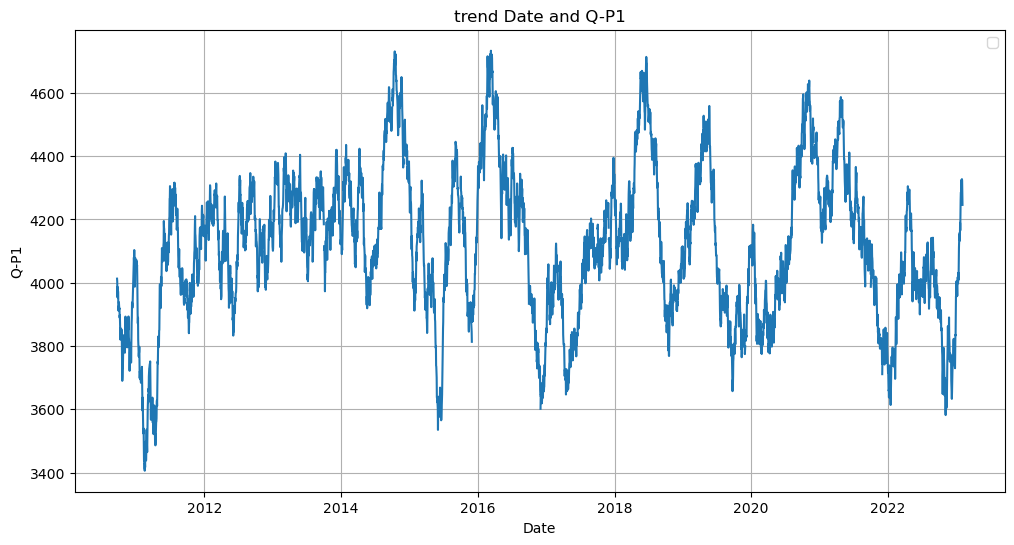

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


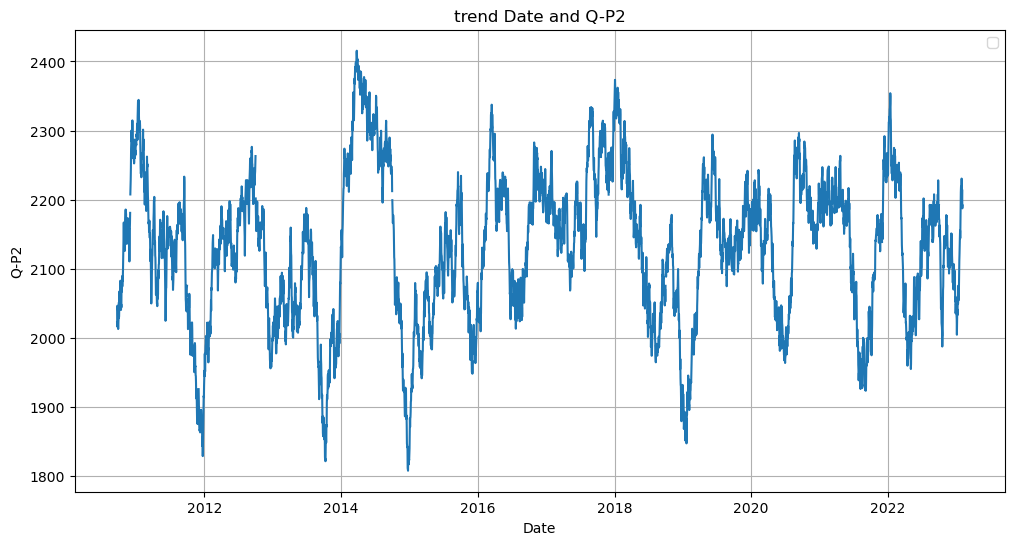

Rolling [window=100,center=False,axis=0,method=single]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


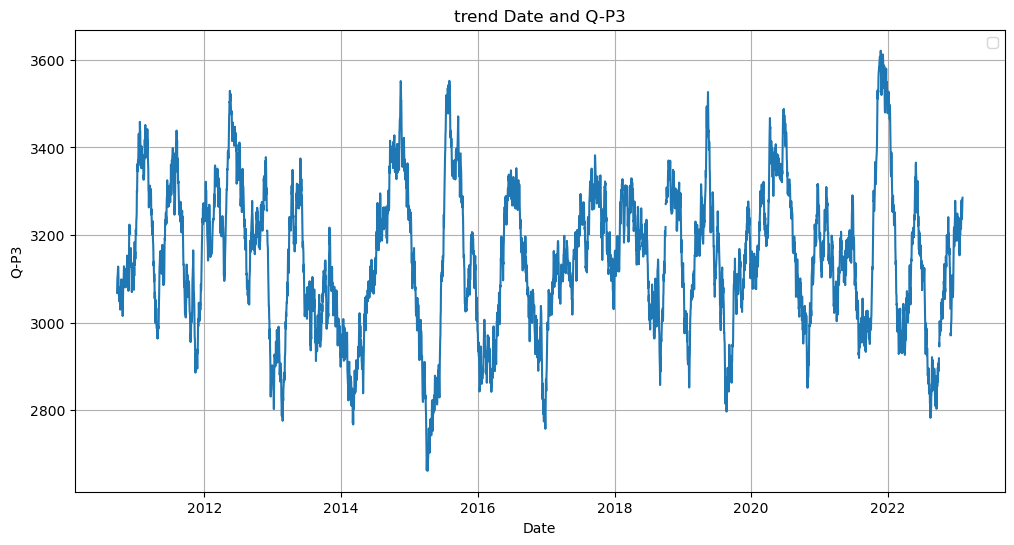

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


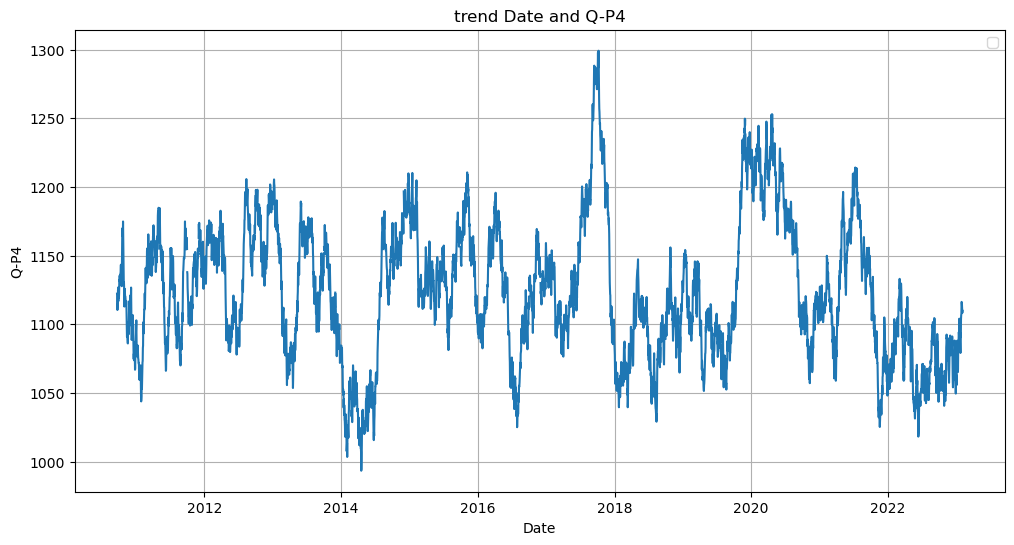

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


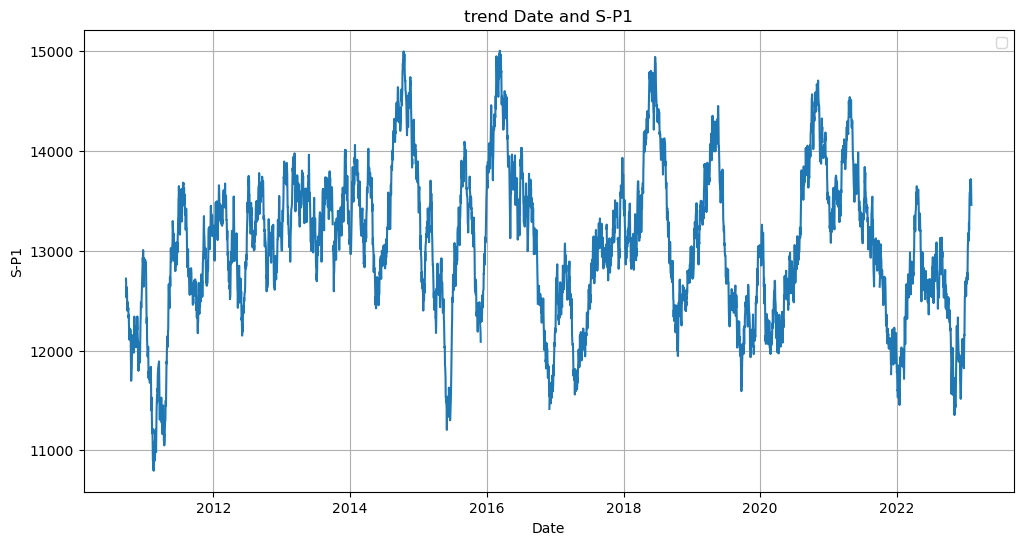

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


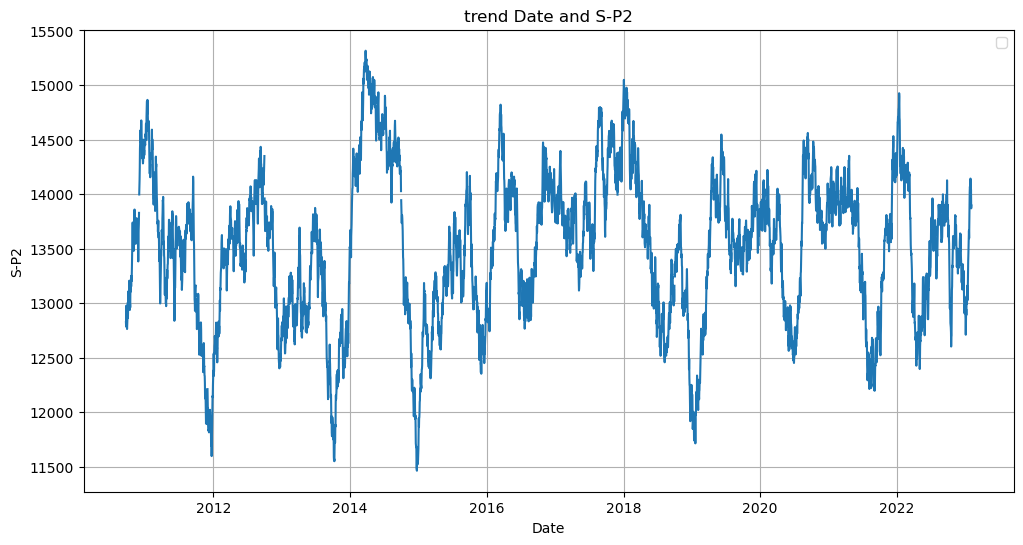

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


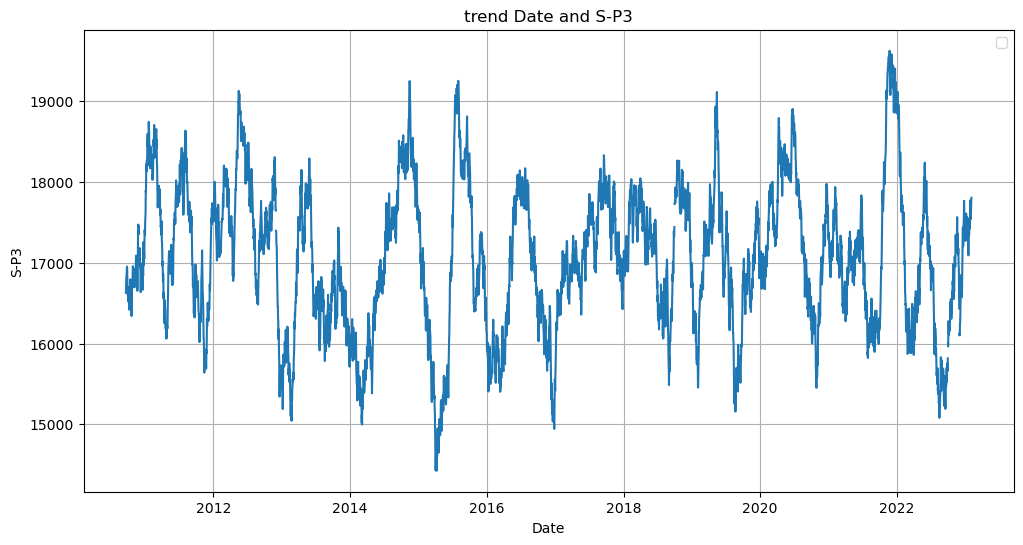

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rolling [window=100,center=False,axis=0,method=single]


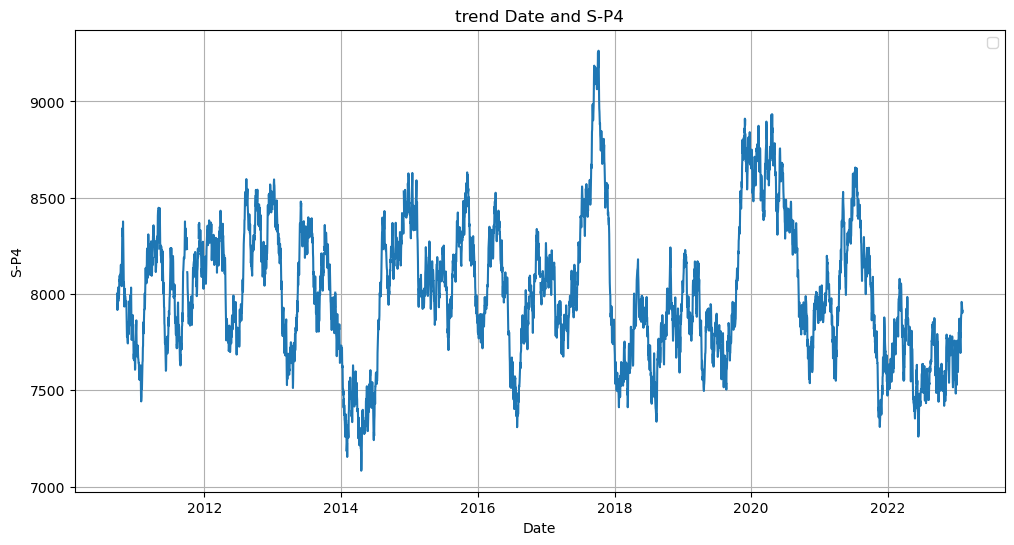

In [96]:
sample = data
for col in data.columns[2:-1]:
    # print(sample[col])
    # break
    plt.figure(figsize=(12, 6))
    moving_average = sample[col].rolling(window=100).mean()
    plt.plot(pd.to_datetime(sample['Date'], format='%d-%m-%Y', errors='coerce'), moving_average)
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title('trend Date and ' + col)
    plt.grid(True)
    plt.legend()
    # Show the plot
    plt.show()

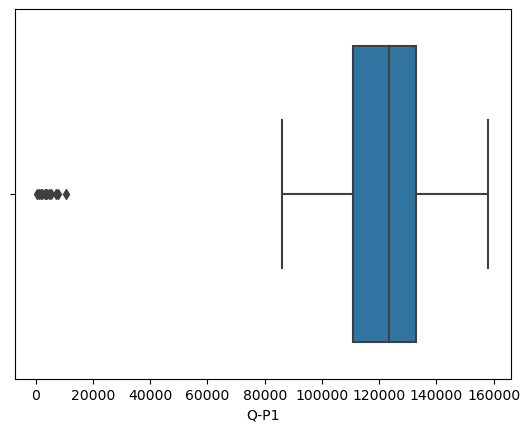

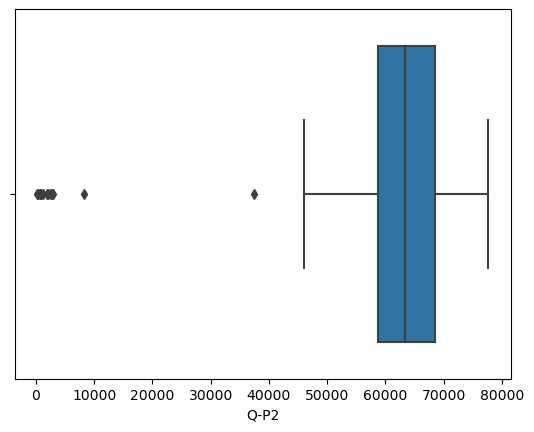

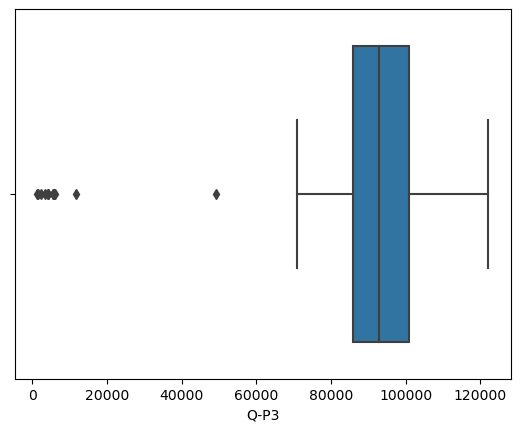

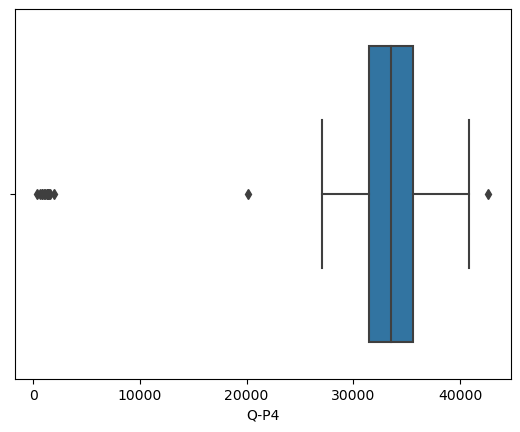

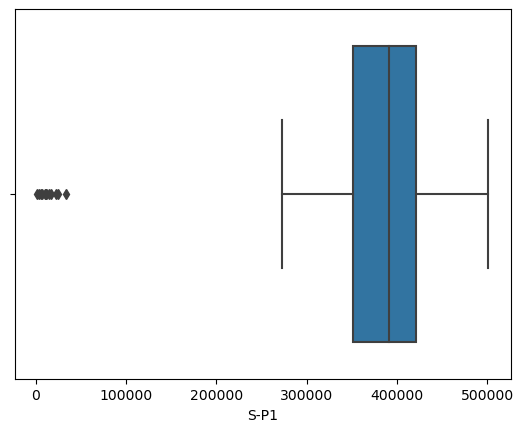

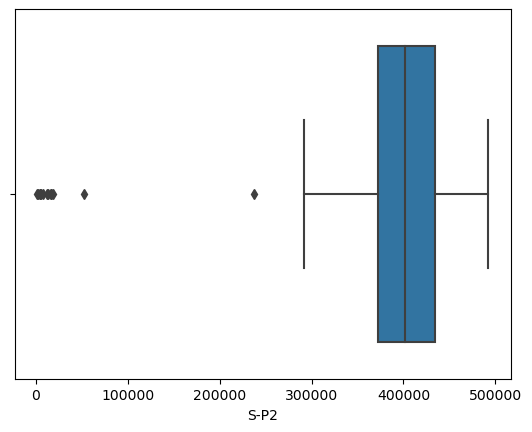

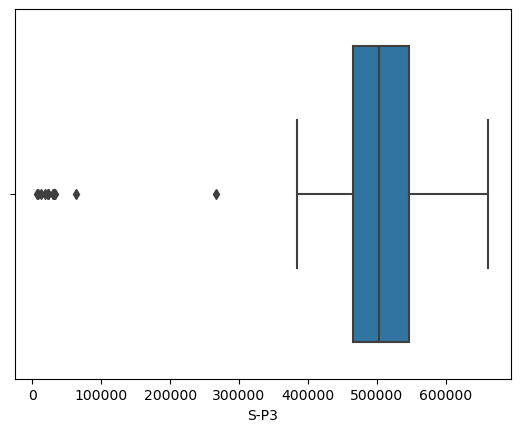

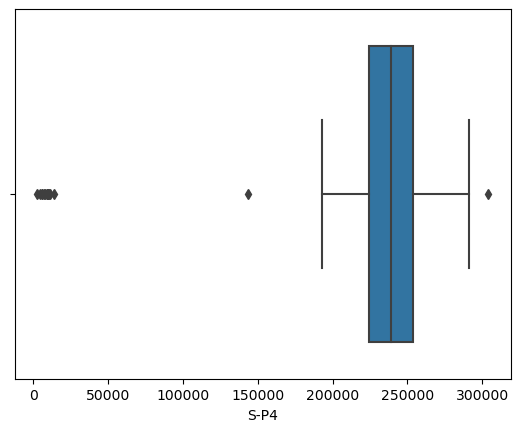

In [132]:
def boxPlotMonth(dataForPlot: pd.DataFrame):
    for col in data.columns[2:]:
        sns.boxplot(x=dataForPlot[col])
        plt.show()

boxPlotMonth(data1)